In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored as cl
import itertools

In [17]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [26]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))

CASE COUNT
--------------------------------------
Total number of cases are 21877
Number of Non-fraud cases are 21791
Number of Fraud cases are 86
Percentage of fraud cases is 0.39


In [5]:
nonfraud_cases = df [df.Class == 0]
fraud_cases= df [df.Class == 1]
print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------
NON-FRAUD CASE AMOUNT STATS
count    21791.000000
mean        71.637403
std        204.790148
min          0.000000
25%          5.990000
50%         17.500000
75%         62.120000
max       7879.420000
Name: Amount, dtype: float64
--------------------------
FRAUD CASE AMOUNT STATS
count      86.000000
mean       93.996860
std       260.195133
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64
--------------------------


In [6]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.379919
1   -0.336709
2    1.497025
3    0.252523
4   -0.008464
5   -0.331929
6   -0.325491
7   -0.150833
8    0.104739
9   -0.331880
Name: Amount, dtype: float64


In [7]:
df = df.dropna()
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train samples :', X_train[:1])
print('X_test samples :',X_test[0:1])
print('y_train samples :', y_train)
print('y_test samples :', y_test)

X_train samples : [[ 1.29434962e+00  1.60632807e-01  4.23000824e-02  2.33040633e-01
   1.44509320e-01  9.72590912e-04 -6.16136502e-02  1.49058361e-02
  -1.36670233e-01  1.03271827e-01  4.41039356e-01  6.78849949e-01
   4.46364721e-01  3.64295707e-01  4.15843566e-01  8.39372741e-01
  -1.09853618e+00  3.32953471e-01  6.09484442e-01 -3.81665345e-02
  -2.80704269e-01 -8.47367240e-01 -2.27321308e-02 -8.42627223e-01
   3.42469472e-01  1.49178820e-01 -3.48415938e-02 -2.49967372e-03
  -3.27929379e-01]]
X_test samples : [[ 0.47549415  2.10262127 -2.00182244  1.9199156   0.77132166 -1.87127731
   0.54427302  0.02954623  0.68066246 -1.79968789  1.62025274 -2.68088403
   2.09844504 -1.89234167  0.24190205  0.90217881  3.69285664  1.75253521
  -0.62435194 -0.02278187 -0.24971168 -0.31487573  0.13918946 -0.00684784
  -0.44029513 -0.43918625  0.10955413 -0.05241539 -0.34529271]]
y_train samples : [0. 0. 0. ... 0. 0. 0.]
y_test samples : [0. 0. 0. ... 0. 0. 0.]


In [18]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [19]:
print(cl('F1 score of the Random Forest Tree model {}'.format(f1_score(y_test,rf_yhat)), attrs = ['bold'], color = 'green'))

F1 score of the Random Forest Tree model 0.8181818181818181


In [20]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
  title = 'Confusion Matrix of {}'.format(title)
  if normalize:
    cm = cm.astype(float) / cm.sum (axis=1)[:, np.newaxis]

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment = 'center',
        color = 'white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

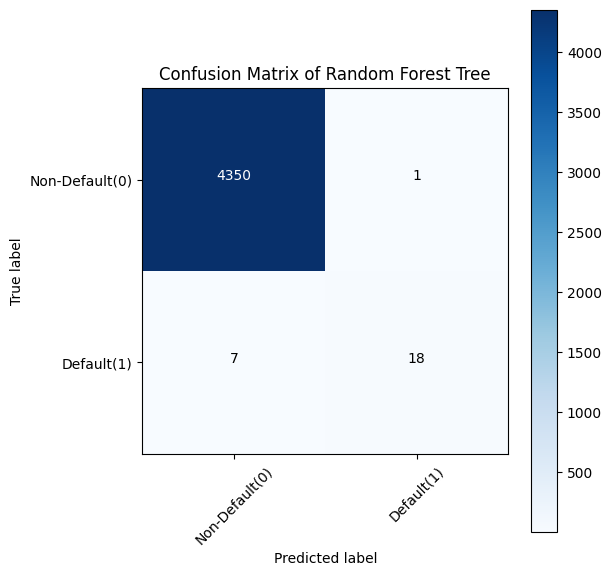

In [25]:
rf_matrix = confusion_matrix(y_test, rf_yhat, labels=[0, 1])

plt.rcParams['figure.figsize'] = (6, 6)

rf_cm_plot = plot_confusion_matrix(rf_matrix,
                                   classes=['Non-Default(0)', 'Default(1)'],
                                   normalize=False,
                                   title='Random Forest Tree')

plt.savefig('rf_cm_plot.png')
plt.show()
